In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
market_share_data = pd.read_csv("data/market_share_data/2009_2025_combined_out.csv")
# If any column has only NA values, drop it
market_share_data.dropna(axis=1, tresh=10, inplace=True)
market_share_data.drop(labels=["OS X", "Unknown","Playstation","Nintendo","Other",
                        "iOS","Android","BlackBerry OS","Chrome OS"], axis=1, inplace=True)
market_share_data.head()
market_share_data.tail()

,Date,Windows,Linux,Unnamed: 10
187,2024-08,71.46,4.55,NaN
188,2024-09,73.35,4.48,NaN
189,2024-10,73.39,4.30,NaN
190,2024-11,72.94,4.04,NaN
191,2024-12,73.38,4.13,NaN


([<matplotlib.axis.YTick at 0x1487ae850>,
 [Text(0, 0, '0'),
  Text(0, 10, '10'),
  Text(0, 20, '20'),
  Text(0, 30, '30'),
  Text(0, 40, '40'),
  Text(0, 50, '50'),
  Text(0, 60, '60'),
  Text(0, 70, '70'),
  Text(0, 80, '80'),
  Text(0, 90, '90'),
  Text(0, 100, '100')])

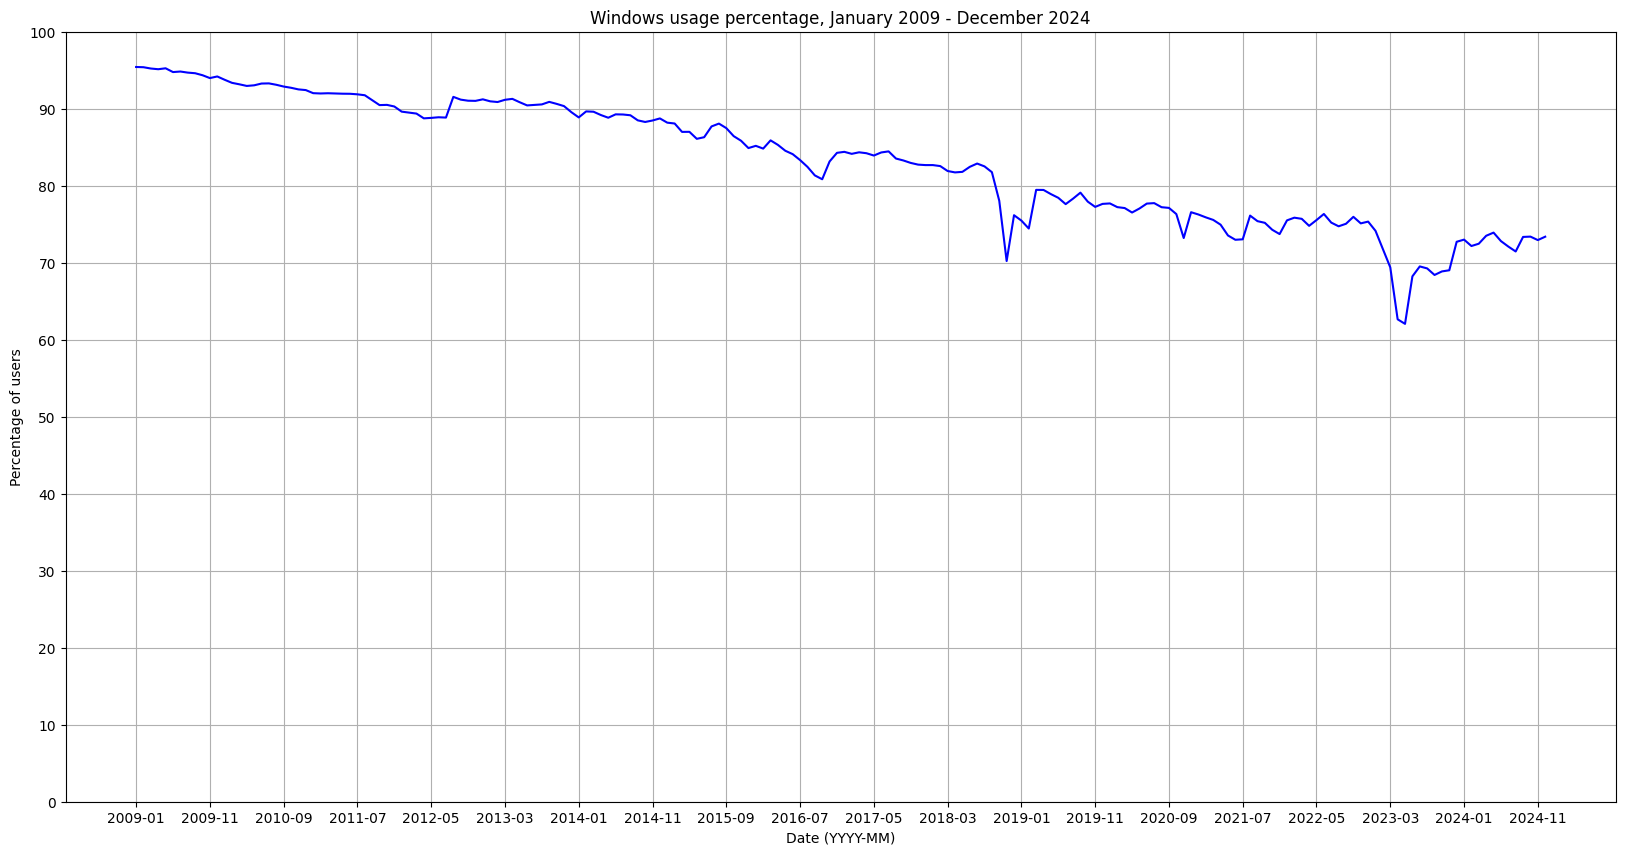

In [7]:
plt.figure(figsize=(20,10))
plt.grid(visible=True)
plt.ylim(0, 100)
plt.plot(market_share_data["Windows"], color="blue")
plt.title("Windows usage percentage, January 2009 - December 2024")
plt.xlabel("Date (YYYY-MM)")
plt.xticks(ticks=range(0, len(market_share_data["Date"]), 10), labels=market_share_data["Date"][::10])
plt.ylabel("Percentage of users")
plt.yticks(ticks=range(0, 101, 10))

([<matplotlib.axis.YTick at 0x14865a490>,
 [Text(0, 0, '0'),
  Text(0, 1, '1'),
  Text(0, 2, '2'),
  Text(0, 3, '3'),
  Text(0, 4, '4'),
  Text(0, 5, '5'),
  Text(0, 6, '6'),
  Text(0, 7, '7'),
  Text(0, 8, '8'),
  Text(0, 9, '9'),
  Text(0, 10, '10')])

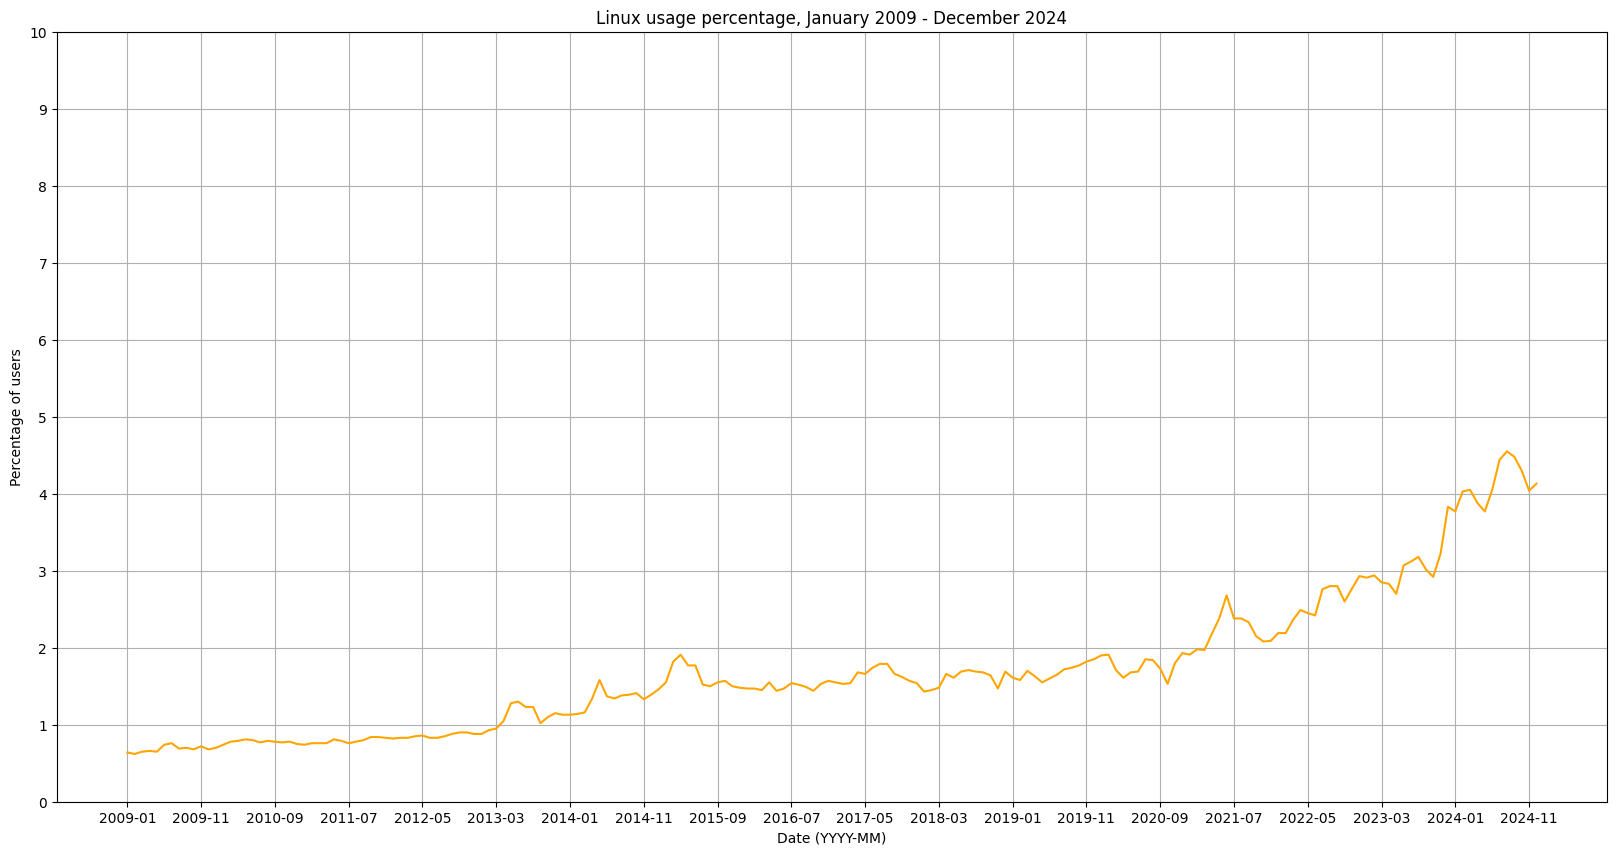

In [4]:
plt.figure(figsize=(20,10))
plt.grid(visible=True)
plt.ylim(0, 10)
plt.plot(market_share_data["Linux"], color="orange")
plt.title("Linux usage percentage, January 2009 - December 2024")
plt.xlabel("Date (YYYY-MM)")
plt.xticks(ticks=range(0, len(market_share_data["Date"]), 10), labels=market_share_data["Date"][::10])
plt.ylabel("Percentage of users")
plt.yticks(ticks=range(0, 11, 1))

Text(0, 0.5, 'Linux')

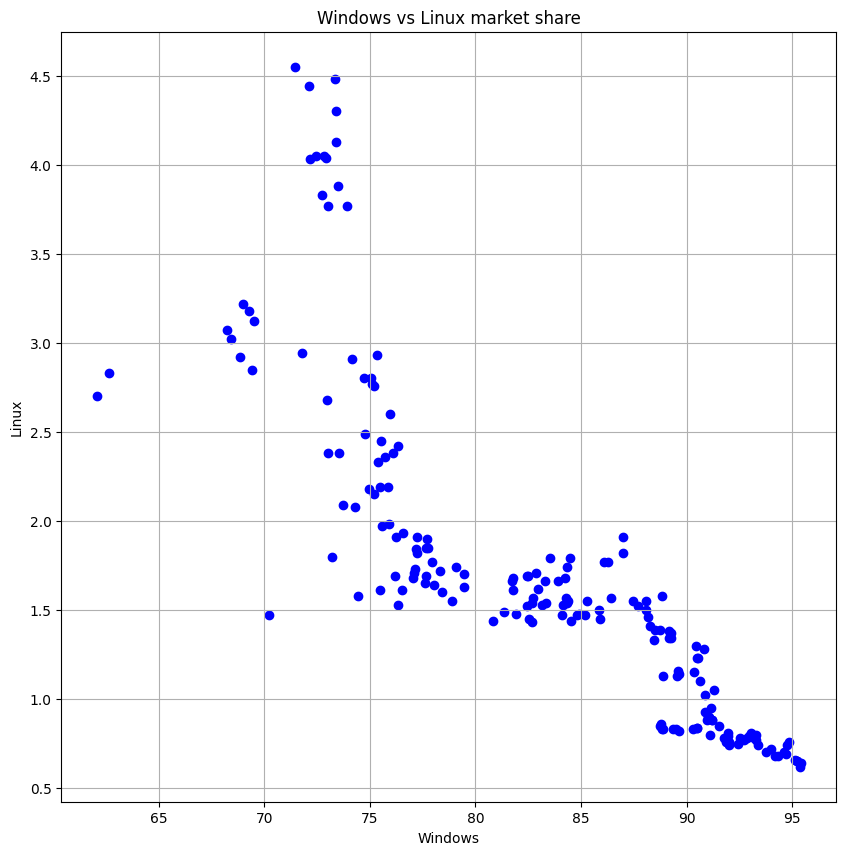

In [5]:
plt.figure(figsize=(10,10))
plt.grid(visible=True)
plt.scatter(market_share_data["Windows"], market_share_data["Linux"], c=["blue"])
plt.title("Windows vs Linux market share")
plt.xlabel("Windows")
plt.ylabel("Linux")